# Machine learning - ridge and lasso regression

In this small project, we will compare two powerful regression techniques with two different penalazing the magnitude of the coefficients methods.<br>
1. **Ridge Regression:**<br>
    - using L2 regularization, adds penalty equivalent to square of magnitude of coefficients
    - keep trade-off balance between the RSS and magnitude of the coefficients<br>
    - minimalize total cost<br>
    <br>
2. **Lasso Regression:**<br>
    - using L1 regularization, adds penalty equivalent to absolute value of magnitude of coefficients<br>
    - keep trade-off balance between the RSS and magnitude of the coefficients<br>
    - minimalize total cost<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import Ridge, Lasso
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 12, 10  # changing plot size

In [3]:
def feat_creator(data, deg):
    # Return polynomial features.
    data_copy=data.copy()
    
    for i in range(2, deg+1):
        colname = 'x_%d' % i
        data_copy[colname] = data_copy['x_1']**i
    return data_copy

In [4]:
def plot_comparison(data, y_pred_rid, y_pred_lass, alpha, models_to_plot={}):
    # Plotting function for regression comparison.
    
    # Check if a plot is to be made for the entered alpha.
    if alpha in models_to_plot:
        
        # Creating a plot for ridge regression.
        plt.subplot(models_to_plot[alpha][0])        
        plt.tight_layout()
        plt.plot(data['x_1'], y_pred_rid)
        plt.plot(data['x_1'], data['y'], 'k.')
        plt.title('Plot for Ridge regression with L2: %.3g' % alpha)
        
        # Creating a plot for lasso regression.
        plt.subplot(models_to_plot[alpha][1])
        plt.tight_layout()
        plt.plot(data['x_1'], y_pred_lass)
        plt.plot(data['x_1'], data['y'], 'k.')
        plt.title('Plot for Lasso regression with L1: %.3g' % alpha)

In [5]:
def coef_list(data, model):
    # Return a list with RSS, intercept and coefficients for particular model.
        
    y_pred, model_inst = model
    rss = sum((y_pred-data['y'])**2)
    weights = [rss]
    weights.extend([model_inst.intercept_])
    weights.extend(model_inst.coef_)
    
    return weights

In [6]:
def ridge_regression(data, alpha):
    X = data.drop('y', axis=1)
    
    # Fit the model.
    ridreg = Ridge(alpha=alpha, normalize=True)
    ridreg.fit(X, data['y'])
    y_pred = ridreg.predict(X)
    
    return y_pred, ridreg

In [7]:
def lasso_regression(data, alpha):
    X = data.drop('y', axis=1)
    
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(X,data['y'])
    y_pred = lassoreg.predict(X)
    
    return y_pred, lassoreg

## Preparing data

In this training project, we will use random data from an array and noisy data created with numpy. We can get desired number of features using function called **feat_creator()**.

In [8]:
data = np.array([i*np.pi/180 for i in range(60, 300, 4)])
np.random.seed(10)
random_data = np.sin(data) + np.random.normal(0, 0.15, len(data))

In [9]:
df = pd.DataFrame(np.column_stack((data, random_data)), columns=('x_1', 'y'))

In [10]:
df.head()

,x_1,y
0,1.047198,1.065763
1,1.117011,1.006086
2,1.186824,0.695374
3,1.256637,0.949799
4,1.326450,1.063496


## Creating penalties list and building a model

Let's prepare sequence of increasing penalty values. Dict called models_to_plot contains desired plot locations for particular penalties. Below we've created a loop which builds ridge/lasso regression models using dataset with polynomial of 10th degree. The next step is to compare plots for chosen penalty values. Last .append methods gathering RSS, intercept and coefficients for each regression model in two lists.

In [11]:
alpha_list = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.5e-1, 1e-1, 1, 5, 10, 20]

In [12]:
models_to_plot = {1e-4:[421, 422], 1e-3: [423, 424], 1e-2:[425 ,426], 1: [427, 428]}

c:\python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


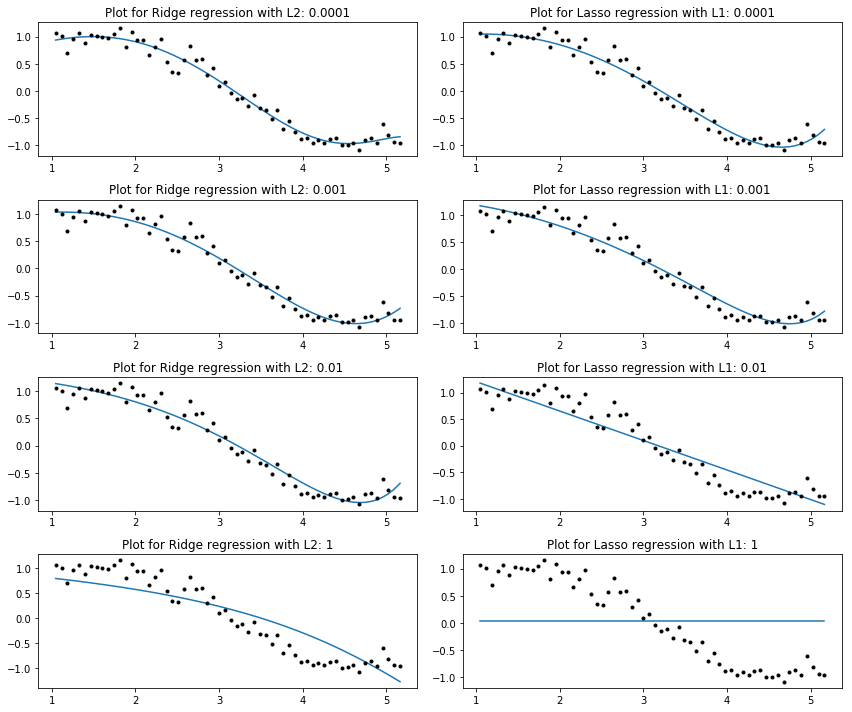

In [13]:
deg = 10
dataset = feat_creator(df, deg)

rss_list_ridge = []
rss_list_lasso = []

for penalty in alpha_list:
    x, y = ridge_regression(dataset, penalty)
    p, k = lasso_regression(dataset, penalty)
    plot_comparison(dataset, x, p, penalty, models_to_plot)
    rss_list_ridge.append(coef_list(dataset, (x, y)))
    rss_list_lasso.append(coef_list(dataset, (p, k)))
    
    

We got a ConvergenceWarning while implementing larger penalty values to build a model. To fit data properly, we need to change the tolerance parameter in lasso approach. We assume that tolerance is so small that the optimization never reaches a lower value. It ends up with coefficients equal to zero using penalty =1 and intercept slightly higher than zero.

We can observe a better data fit using lower values of penalties but it can lead to overfitting. When we look at the plots we can assume that ridge regression better manages higher penalty values than lasso regression. Model's coefficients for penalty equal to 0.0001 have a good magnitude for both approaches. The ridge regression fit seems to deal better with the data, but on the other hand model is more complex than in the lasso approach because of sparsity.

## Results



In [15]:
col = ['RSS', 'intercept'] + ['coefficient x_%d' % i for i in range(1,deg+1)]
ind = ['alpha_%.2g' % alpha_list[i] for i in range(0,len(alpha_list))]

coef_matrix_ridge = pd.DataFrame.from_records(rss_list_ridge, index=ind, columns=col)
coef_matrix_lasso = pd.DataFrame.from_records(rss_list_lasso, index=ind, columns=col)

Setting up display format of dataframe with coefficients values.

In [16]:
pd.options.display.float_format = '{:,.2g}'.format

In [17]:
coef_matrix_lasso

,RSS,intercept,coefficient x_1,coefficient x_2,coefficient x_3,coefficient x_4,coefficient x_5,coefficient x_6,coefficient x_7,coefficient x_8,coefficient x_9,coefficient x_10
alpha_1e-10,1.1,0.27,1,-0.33,-0.019,0.00094,0.00052,0.0001,1.4e-05,1.1e-06,-1.2e-07,-8.5e-08
alpha_1e-08,1.1,0.27,1,-0.33,-0.019,0.00094,0.00052,0.0001,1.4e-05,1.1e-06,-1.2e-07,-8.5e-08
alpha_0.0001,1.2,0.8,0.43,-0.17,-0.016,-0,0,5.9e-05,1.6e-05,8.3e-07,0,-0
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,9.9e-08
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0
alpha_0.05,12,0.97,-0.3,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_0.1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [18]:
coef_matrix_ridge

,RSS,intercept,coefficient x_1,coefficient x_2,coefficient x_3,coefficient x_4,coefficient x_5,coefficient x_6,coefficient x_7,coefficient x_8,coefficient x_9,coefficient x_10
alpha_1e-10,0.94,7.3,-18,19,-9.5,2.1,-0.024,-0.055,0.0018,0.0015,-0.00015,-6.2e-07
alpha_1e-08,0.95,0.8,-0.65,1.5,-0.86,0.13,0.021,-0.0045,-0.0012,9.7e-05,7.2e-05,-9.2e-06
alpha_0.0001,1,0.38,0.73,-0.15,-0.037,-0.0041,0.00012,0.00018,4.9e-05,7.8e-06,1.5e-07,-4.4e-07
alpha_0.001,1.2,0.81,0.36,-0.12,-0.023,-0.0023,7.8e-05,9e-05,2.3e-05,3.6e-06,1.5e-07,-1.4e-07
alpha_0.01,1.5,1.3,-0.1,-0.052,-0.0098,-0.0013,-0.00011,5.5e-06,4.8e-06,1.3e-06,2.7e-07,4.5e-08
alpha_0.05,1.7,1.4,-0.22,-0.04,-0.0065,-0.00089,-9.4e-05,-3.3e-06,2e-06,8e-07,2.2e-07,5.3e-08
alpha_0.1,2,1.4,-0.24,-0.036,-0.0056,-0.00075,-8.1e-05,-3.6e-06,1.4e-06,6.4e-07,1.8e-07,4.5e-08
alpha_1,6.4,0.96,-0.14,-0.019,-0.0029,-0.00043,-6e-05,-7.5e-06,-7.2e-07,-1.4e-08,1.9e-08,7.5e-09
alpha_5,14,0.55,-0.06,-0.0087,-0.0015,-0.00025,-4.3e-05,-7.4e-06,-1.3e-06,-2.2e-07,-3.7e-08,-6.2e-09
alpha_10,18,0.4,-0.039,-0.0058,-0.001,-0.00018,-3.2e-05,-5.8e-06,-1e-06,-1.9e-07,-3.4e-08,-6.2e-09


## Conclusion

Now that we have compared both approaches, let's highlight a few important notes to keep in mind. The major advantage of ridge regression is coefficient shrinkage and reducing model complexity. This approach is commonly used to prevent overfitting where number of features is not large. Another thing worth to point out is that ridge regression works well with highly correlated features but the distribution of coefficients among them will depend on strength of correlation. Lasso approach selects one feature among the highly correlated set and shrinks other features to zero. Feature selection has a significant impact on the final result and there is some variance related to this. Due to sparse solution, it can be used in wide range of features in model. There are also some other approaches e.g. Elastic Net which combines both L1 and L2 regularization.